In [1]:
import numpy as np
import pandas as pd
import gzip
from rdkit import DataStructs
from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem.inchi import MolToInchiKey

RDLogger.DisableLog('rdApp.error')

In [31]:
df = np.load('df.npy', allow_pickle=True)
df = pd.DataFrame(df)
df.columns = ['Mol', 'Source', 'FP']
df.drop(columns=['FP'], inplace=True)

with gzip.open('decoys_final.sdf.gz') as sdf:
    supp_decoys = Chem.ForwardSDMolSupplier(sdf)
    decoys = [[mol, 'decoys'] for mol in supp_decoys if mol]

df_de = pd.DataFrame(decoys, columns=['Mol', 'Source'])

df = pd.concat([df, df_de], ignore_index=True)
df

,Mol,Source
0,<rdkit.Chem.rdchem.Mol object at 0x7fee2e1bf770>,DrugBank
1,<rdkit.Chem.rdchem.Mol object at 0x7fee2e1a0970>,DrugBank
2,<rdkit.Chem.rdchem.Mol object at 0x7fee2d2fce30>,DrugBank
3,<rdkit.Chem.rdchem.Mol object at 0x7fee2d2fcc30>,DrugBank
4,<rdkit.Chem.rdchem.Mol object at 0x7fee2d2fcb30>,DrugBank
...,...,...
36236,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e65d0>,decoys
36237,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6670>,decoys
36238,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6710>,decoys
36239,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e67b0>,decoys


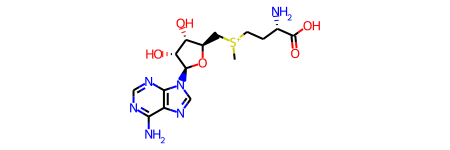

In [32]:
from rdkit.Chem.Scaffolds import MurckoScaffold

sub = df.Mol[11]
sub

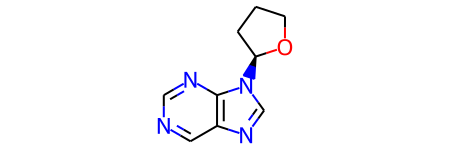

In [33]:
scaffold1 = MurckoScaffold.GetScaffoldForMol(sub)
scaffold1

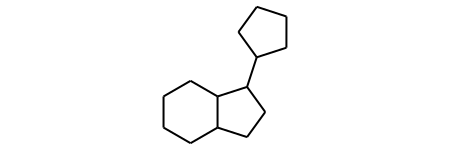

In [34]:
scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

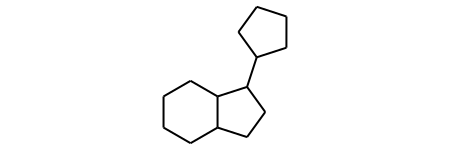

In [35]:
scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
scaffold3

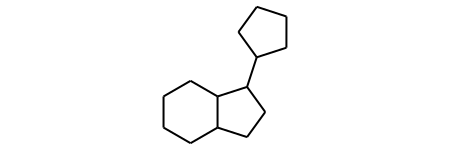

In [36]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff

scaffold(sub)

In [37]:
df['Scaffold'] = df.Mol.apply(scaffold)
df

,Mol,Source,Scaffold
0,<rdkit.Chem.rdchem.Mol object at 0x7fee2e1bf770>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6e40>
1,<rdkit.Chem.rdchem.Mol object at 0x7fee2e1a0970>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6a30>
2,<rdkit.Chem.rdchem.Mol object at 0x7fee2d2fce30>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2d5c6a80>
3,<rdkit.Chem.rdchem.Mol object at 0x7fee2d2fcc30>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6f80>
4,<rdkit.Chem.rdchem.Mol object at 0x7fee2d2fcb30>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6c10>
...,...,...,...
36236,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e65d0>,decoys,<rdkit.Chem.rdchem.Mol object at 0x7fee2d1e5260>
36237,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6670>,decoys,<rdkit.Chem.rdchem.Mol object at 0x7fee2d1e5170>
36238,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6710>,decoys,<rdkit.Chem.rdchem.Mol object at 0x7fee2d1e53a0>
36239,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e67b0>,decoys,<rdkit.Chem.rdchem.Mol object at 0x7fee2d1e53f0>


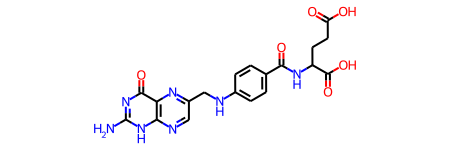

In [38]:
df.Mol[50]

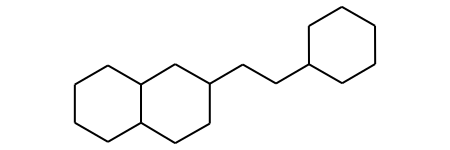

In [39]:
df.Scaffold[50]

In [102]:
def get_smiles(mol):
    if not mol:
        return None
    else:
        return Chem.MolToSmiles(mol, canonical=True)

In [106]:
# scaffold to smiles in dataframe
df['ScaffoldSmiles'] = df.Scaffold.apply(get_smiles)
df

,Mol,Source,Scaffold,ScaffoldSmiles
0,<rdkit.Chem.rdchem.Mol object at 0x7fee2e1bf770>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6e40>,C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CC...
1,<rdkit.Chem.rdchem.Mol object at 0x7fee2e1a0970>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6a30>,C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2...
2,<rdkit.Chem.rdchem.Mol object at 0x7fee2d2fce30>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2d5c6a80>,C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CC...
3,<rdkit.Chem.rdchem.Mol object at 0x7fee2d2fcc30>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6f80>,C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCC...
4,<rdkit.Chem.rdchem.Mol object at 0x7fee2d2fcb30>,DrugBank,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6c10>,C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1
...,...,...,...,...
36236,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e65d0>,decoys,<rdkit.Chem.rdchem.Mol object at 0x7fee2d1e5260>,C1CCC(C2CC3CC4CCCCC4C(C4CCCCC4)C3C2)CC1
36237,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6670>,decoys,<rdkit.Chem.rdchem.Mol object at 0x7fee2d1e5170>,C1CCC(C2CC3CC4CCCCC4C(C4CCCCC4)C3C2)CC1
36238,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e6710>,decoys,<rdkit.Chem.rdchem.Mol object at 0x7fee2d1e53a0>,C1CCC(C2CC3CC4CCCCC4C(C4CCCCC4)C3C2)CC1
36239,<rdkit.Chem.rdchem.Mol object at 0x7fee2c9e67b0>,decoys,<rdkit.Chem.rdchem.Mol object at 0x7fee2d1e53f0>,C1CCC(CCC2CCCC(C3CCCCC3)C2)CC1


In [107]:
len(df.ScaffoldSmiles.unique())

7508

In [109]:
df[df.ScaffoldSmiles == None]

,Mol,Source,Scaffold,ScaffoldSmiles


In [145]:
# counts of scaffoldsSmiles from DrugBank
len_db = len(df[df.Source == 'DrugBank'])
counts_db = df[df.Source == 'DrugBank'].ScaffoldSmiles.value_counts() / len_db
counts_db.index = pd.Series(counts_db.index).replace('', 'C')
counts_db[0:10]

C1CCCCC1                       0.146030
C                              0.137175
C1CCC2CCCC2C1                  0.026985
C1CCCC1                        0.026423
C1CCC(CC2CCCCC2)CC1            0.025580
C1CCC(C2CCCC2)CC1              0.024736
C1CCC2CCCCC2C1                 0.023893
C1CCC2C(C1)CCC2C1CCCC1         0.023190
C1CCC2C(C1)CCC1C3CCCC3CCC21    0.021223
C1CCC(CCC2CCCCC2)CC1           0.014898
Name: ScaffoldSmiles, dtype: float64

Index(['C1CCCCC1', 'C', 'C1CCC2CCCC2C1', 'C1CCCC1'], dtype='object')
['0.1460295151089248', '0.1371749824314828', '0.026985242445537596', '0.026423049894588897']
[<rdkit.Chem.rdchem.Mol object at 0x7fee2c946670>, <rdkit.Chem.rdchem.Mol object at 0x7fee26f4e940>, <rdkit.Chem.rdchem.Mol object at 0x7fee26f4e260>, <rdkit.Chem.rdchem.Mol object at 0x7fee26f4e170>]


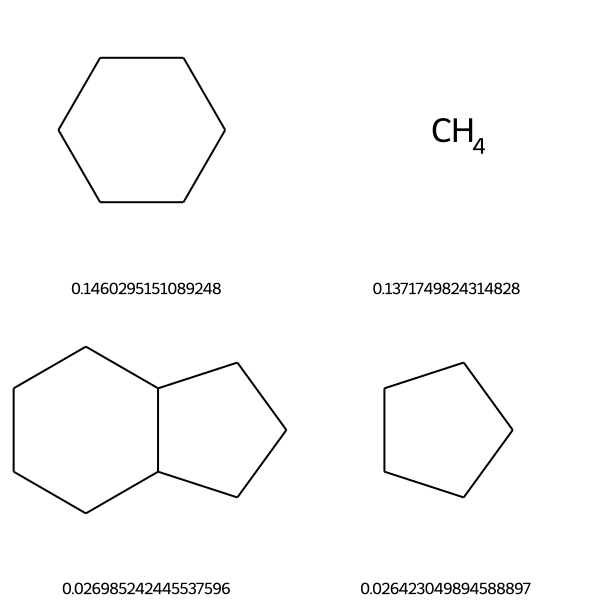

In [146]:
# moltogridimage from rdkit
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage

# get 10 most common scaffolds from DrugBank
scaffolds = counts_db.index[0:4]
print(scaffolds)
labels = [str(i) for i in list(counts_db[0:4].values)]
print(labels)

# get mol objects from smiles
mols = [Chem.MolFromSmiles(s) for s in scaffolds]
print(mols)

# visualize mols
MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=labels)


In [92]:
benzene = Chem.MolFromSmiles('C1=CC=CC=C1')
MolsToGridImage(benzene)

TypeError: object of type 'Mol' has no len()

In [45]:
# count of scaffoldsSmiles from actives
actives_len = len(df[df.Source == 'actives'])
counts_actives = df[df.Source == 'actives'].ScaffoldSmiles.value_counts() / actives_len
counts_actives[0:10]

C(CC1CCC(C2CCCC2)CC1)CC1CCC(C2CC2)C1         0.045113
C1CCC(CCC2CCC3CCC4CCCC4C23)CC1               0.028822
C1CCC(CCCC2CCCC3C2CC2C(C4CCCCC4)CCC32)CC1    0.027569
C1CC2CCC3CCCC3C2C1                           0.017544
C1CCC2C(C1)CC1C(C3CCCC3)CCC21                0.015038
C1CCC(C2CCC3CCC4CCCC4C32)CC1                 0.015038
C1CCC(CCC2CCCC2CCC2CCCCC2)CC1                0.012531
C1CCC(CC2CCCC(C3CCC4CCCCC43)C2)CC1           0.012531
C1CCC(C2CCC3C4CCCCC4CC23)CC1                 0.012531
C1CCC(CCCC2CCC3CCC(CCC4CCCCC4)C3C2)CC1       0.011278
Name: ScaffoldSmiles, dtype: float64

In [46]:
# count of scaffoldsSmiles from decoys
decoys_len = len(df[df.Source == 'decoys'])
counts_decoys = df[df.Source == 'decoys'].ScaffoldSmiles.value_counts() / decoys_len
counts_decoys[0:10]

C1CCCCC1                   0.032547
C1CCC(CCC2CCCCC2)CC1       0.024534
C1CCC(CC2CCCCC2)CC1        0.018639
C1CCC(CCC2CCCC2)CC1        0.016591
C1CCC(CCCCC2CCCCC2)CC1     0.015885
C1CCC(CCCC2CCCCC2)CC1      0.013238
C1CCC(CCCC2CCCC2)CC1       0.011755
C1CCC(C2CCCC2)CC1          0.011579
C1CCC2CCCC2C1              0.011332
C1CCC(CCCCCC2CCCCC2)CC1    0.011120
Name: ScaffoldSmiles, dtype: float64